In [0]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:
#Data Preprocessing
#importing the data set 
data = pd.read_csv("bank_data.csv")
x = data.iloc[:,3:-1].values
y = data["Exited"].values

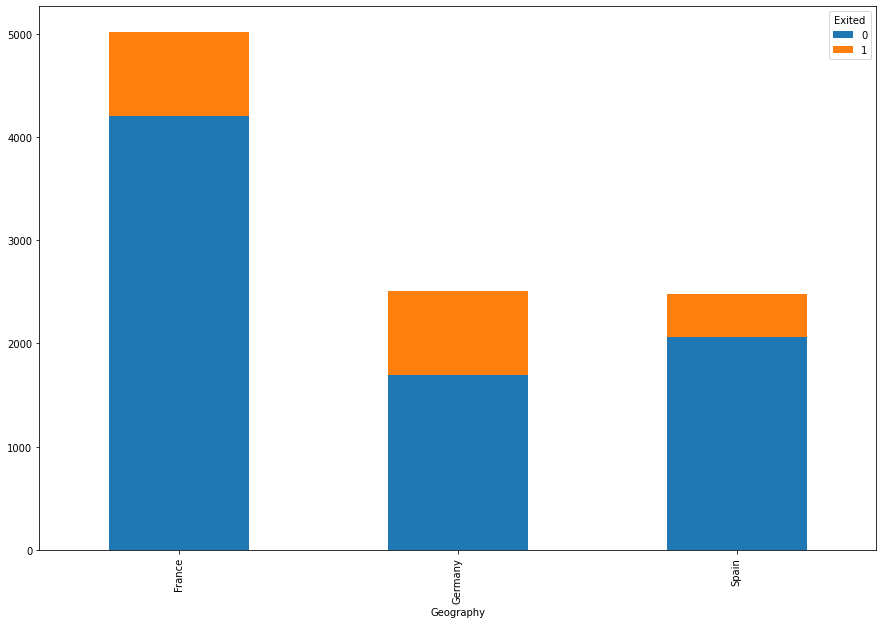

In [0]:
#plotting the graph
data.groupby(["Geography", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,10));

In [0]:
#converting the categorical columns
#label encoding for the gender  
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])
 
#one hot encoding for the geography
ct = ColumnTransformer(transformers = [('encoder',
                                        OneHotEncoder(),[1])],
                       remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [0]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [0]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [0]:
#feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [0]:
#initialising the ann
ann = tf.keras.models.Sequential()

In [0]:
#adding input and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [0]:
#compling the ann
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
#training the ann
ann.fit(x_train,y_train,batch_size=40,epochs=200)

Epoch 1/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8603
Epoch 2/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8595
Epoch 3/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8600
Epoch 4/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8609
Epoch 5/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8619
Epoch 6/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8613
Epoch 7/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8608
Epoch 8/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8607
Epoch 9/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8616
Epoch 10/200
188/188 [==============================] - 0s 1ms/step - loss: 0.3379 - accura

In [0]:
#prediction of test
pred = ann.predict(x_test)
pred = (pred>0.5)
print(np.concatenate((pred.reshape(len(pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [0]:
#confusion matrix
cm=confusion_matrix(pred,y_test)
print(cm)
accuracy_score(y_test,pred)

[[1921  280]
 [  70  229]]


0.86